In [1]:
import nltk
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sms = pd.read_csv('sms_classifier.csv')
df_sms

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

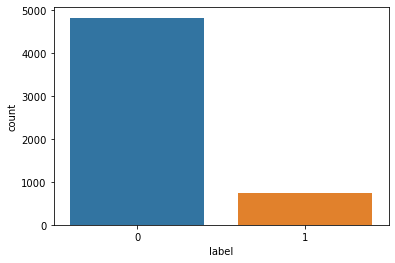

In [3]:
sns.countplot(df_sms.label)

In [4]:
df_sms[(df_sms.label==1)]

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [5]:
def sentiment(x):
    if x == 1:
        return 'spam'
    else:return 'not_spam'   

In [6]:
df_sms['sentiment'] = df_sms['label'].apply(sentiment) #applying sentimenet function

df_sms.drop('label',axis=1,inplace=True) #dropping origiinal label column

In [7]:
#leets conveert all thee sms to lower case
df_sms['sms'] = df_sms['sms'].apply(lambda x:" ".join(x.lower() for x in x.split()))


In [8]:
all_words = [x for x in pd.Series(''.join(df_sms['sms']).split())]


In [9]:
nltk.FreqDist(all_words).most_common(50)

[('to', 2231),
 ('i', 1811),
 ('you', 1765),
 ('a', 1414),
 ('the', 1292),
 ('and', 944),
 ('u', 923),
 ('is', 841),
 ('in', 839),
 ('my', 716),
 ('for', 686),
 ('your', 649),
 ('of', 611),
 ('me', 578),
 ('have', 547),
 ('call', 531),
 ('on', 512),
 ('2', 451),
 ('are', 446),
 ('that', 441),
 ('it', 438),
 ('or', 406),
 ('but', 404),
 ('at', 381),
 ('not', 380),
 ('so', 376),
 ('with', 375),
 ('be', 374),
 ('ur', 370),
 ('will', 367),
 ('get', 360),
 ('can', 350),
 ('if', 346),
 ('just', 321),
 ('do', 313),
 ('we', 305),
 ('this', 283),
 ("i'm", 273),
 ('from', 270),
 ('go', 261),
 ('when', 261),
 ('4', 253),
 ('&lt;#&gt;', 250),
 ('all', 247),
 ('up', 243),
 ('like', 230),
 ('know', 224),
 ('got', 222),
 ('.', 220),
 ('was', 219)]

In [10]:
#lets clean the aall words removing stop words and punctuatiion
stop_words=nltk.corpus.stopwords.words('english')+list(string.punctuation)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
all_words_clean = [word for word in all_words if word not in stop_words]
all_words_clean_freq = nltk.FreqDist(all_words_clean)

In [12]:
all_words_clean_freq

FreqDist({'u': 923, 'call': 531, '2': 451, 'ur': 370, 'get': 360, "i'm": 273, 'go': 261, '4': 253, '&lt;#&gt;': 250, 'like': 230, ...})

In [13]:
len(all_words_clean)

51256

In [14]:
word_features = [item[0] for item in all_words_clean_freq.most_common(2000)]

In [15]:
word_features

['u',
 'call',
 '2',
 'ur',
 'get',
 "i'm",
 'go',
 '4',
 '&lt;#&gt;',
 'like',
 'know',
 'got',
 'come',
 'free',
 'send',
 'want',
 'text',
 'time',
 'need',
 'going',
 'good',
 "i'll",
 'love',
 'txt',
 'n',
 'one',
 'still',
 '...',
 'r',
 'see',
 'ü',
 'new',
 'think',
 'mobile',
 'reply',
 'tell',
 'take',
 'dont',
 'back',
 'claim',
 'home',
 'stop',
 'make',
 'day',
 'give',
 'hope',
 'phone',
 'please',
 'much',
 '&amp;',
 'ask',
 'happy',
 'great',
 'e',
 'really',
 'da',
 'say',
 'last',
 'meet',
 'miss',
 'c',
 'pls',
 'would',
 'cos',
 'im',
 'find',
 'now.',
 'every',
 'way',
 'pick',
 'work',
 'contact',
 'nokia',
 'week',
 'ok',
 'said',
 'me.',
 'right',
 'let',
 'now!',
 'keep',
 'number',
 'win',
 'cash',
 'you.',
 'sent',
 'cant',
 'b',
 '1',
 'could',
 'even',
 'prize',
 'next',
 'gonna',
 'feel',
 'went',
 'today',
 'many',
 'per',
 "can't",
 'msg',
 'night',
 'always',
 'sure',
 'buy',
 'dun',
 'wan',
 'told',
 'gud',
 'later',
 'someone',
 "i've",
 'service',
 '

In [16]:
def document_features(document): 
    document_words = set(document)
    features = {} 
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [17]:
frame =df_sms.copy() #storing Apple_tweets in another variables

frame['sms'] = frame.apply(lambda row: nltk.word_tokenize(str(row['sms'])), axis=1) #the features of the 'frame' data frame are stored in the variable 'feature'

frame['sentiment'] = frame.sentiment

In [18]:
frame

,sms,sentiment
0,"[go, until, jurong, point, ,, crazy, .., avail...",not_spam
1,"[ok, lar, ..., joking, wif, u, oni, ...]",not_spam
2,"[free, entry, in, 2, a, wkly, comp, to, win, f...",spam
3,"[u, dun, say, so, early, hor, ..., u, c, alrea...",not_spam
4,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",not_spam
...,...,...
5569,"[this, is, the, 2nd, time, we, have, tried, 2,...",spam
5570,"[will, ü, b, going, to, esplanade, fr, home, ?]",not_spam
5571,"[pity, ,, *, was, in, mood, for, that, ., so, ...",not_spam
5572,"[the, guy, did, some, bitching, but, i, acted,...",not_spam


In [19]:
featuresets = [(document_features(sms),sentiment) for index, (sms,sentiment) in frame.iterrows()]

In [20]:
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [21]:
print(nltk.classify.accuracy(classifier, test_set))

0.9784817692767483


Summary: Project Achievement

Through dedicated efforts and effective implementation, we have successfully developed a simple SMS Spam Classification model. By leveraging powerful text preprocessing techniques, feature extraction, and machine learning algorithms(NB), we have achieved exceptional results in accurately distinguishing between "ham" (non-spam) and "spam" messages. 

Our Simple SMS Spam Classification model has demonstrated an accuracy rate of 97%. This high accuracy signifies the model's ability to correctly classify incoming messages. 